In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('cell2celltrain.csv')
train = train.dropna().drop_duplicates()
X_train = train.drop(["CustomerID"], axis = 1)
y_train = train['Churn']
X_test = pd.read_csv('cell2cellholdout.csv')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(49752, 57)
(49752,)
(20000, 58)


In [2]:
from sklearn.preprocessing import LabelBinarizer
lbin = LabelBinarizer()
y_train = lbin.fit_transform(y_train)
X_train["Churn"] = lbin.fit_transform(X_train["Churn"])
X_train = X_train.select_dtypes(include=['float64','int64'])
print(X_train.shape)

(49752, 34)


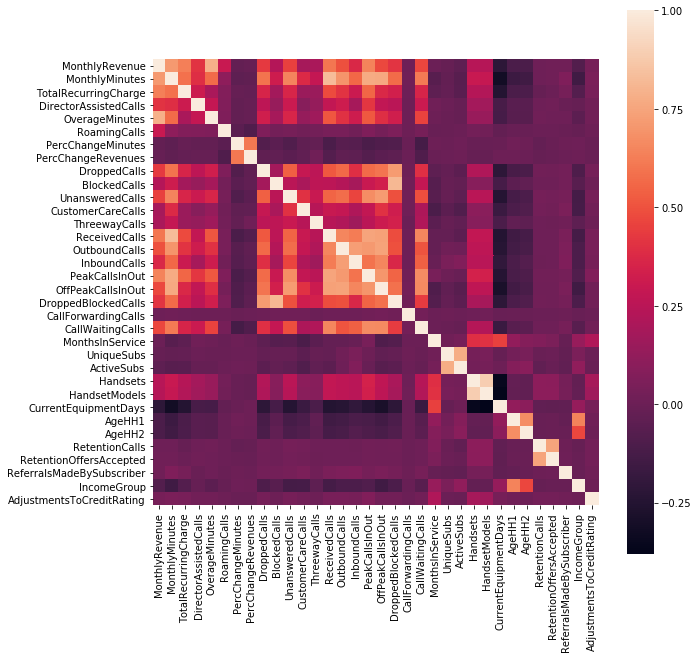

In [3]:
columns = X_train
cor = columns.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, square=True, ax=ax)

In [4]:
X_train.corr().unstack().sort_values(ascending=False).drop_duplicates()

AdjustmentsToCreditRating  AdjustmentsToCreditRating    1.000000
Handsets                   HandsetModels                0.888262
ReceivedCalls              MonthlyMinutes               0.828206
BlockedCalls               DroppedBlockedCalls          0.813961
OverageMinutes             MonthlyRevenue               0.787317
ActiveSubs                 UniqueSubs                   0.773931
PeakCallsInOut             MonthlyMinutes               0.772486
OffPeakCallsInOut          MonthlyMinutes               0.765215
RetentionCalls             RetentionOffersAccepted      0.749366
ReceivedCalls              PeakCallsInOut               0.746857
OutboundCalls              OffPeakCallsInOut            0.741615
ReceivedCalls              OffPeakCallsInOut            0.737797
InboundCalls               OutboundCalls                0.725728
UnansweredCalls            OffPeakCallsInOut            0.718800
DroppedCalls               DroppedBlockedCalls          0.717652
MonthlyMinutes           

In [5]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X_train, 2)
kmeans = pd.DataFrame(clust_labels)
X_train.insert((X_train.shape[1]),'kmeans',kmeans)

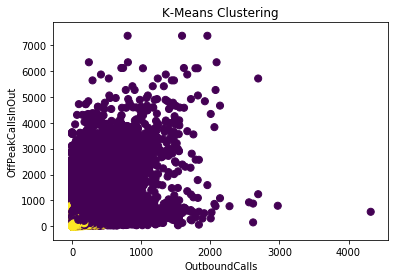

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
all_params = ['ReceivedCalls', 'MonthlyMinutes', 
              'BlockedCalls', 'DroppedBlockedCalls', 
              'OverageMinutes', 'MonthlyRevenue', 
              'ActiveSubs', 'UniqueSubs', 
              'PeakCallsInOut', 'MonthlyMinutes', 
              'OffPeakCallsInOut', 'MonthlyMinutes', 
              'RetentionCalls', 'RetentionOffersAccepted', 
              'ReceivedCalls', 'PeakCallsInOut', 
              'OutboundCalls', 'OffPeakCallsInOut']
for param in range(0, len(all_params), 2):
    scatter = ax.scatter(X_train[all_params[param]], X_train[all_params[param + 1]],c=kmeans[0], s=50)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(all_params[param])
    ax.set_ylabel(all_params[param+1])
    plt.colorbar
    plt.draw()
    plt.savefig('./Plots/{}.png'.format(param))

In [7]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X_train.columns, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

ValueError: could not convert string to float: 'MonthlyRevenue'

In [ ]:
# reducing dimensionality

from sklearn.decomposition import PCA

decompose = [PCA(n_components = 2), PCA(n_components = 3), PCA(n_components = 5), PCA(n_components = 7)]
train_datas = []
for model in decompose:
    train_datas.append(model.fit_transform(X_train))

kmeans = KMeans(n_clusters=2)
for data in train_datas:
    kmeans.fit(data)
    correct = 0
    for i in range(len(data)):
        predict_me = np.array(data[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = kmeans.predict(predict_me)
        if prediction[0] == y_train[i]:
            correct += 1
    print(correct/len(data))

In [ ]:
enc1 = cluster_target_encoder()
labels_train =  